In [1]:
%matplotlib inline 

import os 

import pystan 
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# ファイルの読み込み
file_beer_sales_1 = pd.read_csv('book-data/2-4-1-beer-sales-1.csv')
file_beer_sales_1.head()

,sales
0,87.47
1,103.67
2,83.29
3,131.91
4,106.59


In [3]:
sample_size = len(file_beer_sales_1)

In [4]:
# stan用のデータセットの作成
stan_data = {
    'N': sample_size,
    'sales': file_beer_sales_1['sales']
}

# stanファイルを読み込む
if os.path.exists('book-data/2-4-1-calc-mean-variance.pkl'):
    sm = pickle.load(open('bool-data/2-4-1-calc-mean-variance.pkl', 'rb'))
else:
    sm = pystan.StanModel(file='book-data/2-4-1-calc-mean-variance.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2432c9f885dd5c1b23c7e7b414489ee7 NOW.
C:\Users\s44990\AppData\Local\Programs\Python\virtualenvs\py38_pystan2_17\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\s44990\AppData\Local\Temp\tmp7tba01l6\stanfit4anon_model_2432c9f885dd5c1b23c7e7b414489ee7_3740304375954815993.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [5]:
# MCMCの実行

# 乱数の生成
mcmc_result = sm.sampling(
    data=stan_data,                       # 対象データ
    seed=1,                               # 乱数の種
    chains=4,                             # 乱数生成のセット数
    iter=2000,                            # 乱数生成の繰り返し数
    warmup=1000,                          # バーンイン期間
    thin=1                                # 間引き数(1なら間引きなし)
)


# saving complied model
with open('2-4-1-calc-mean-variance.pkl', 'wb') as f:
    pickle.dump(sm, f)

# 結果の表示
print(mcmc_result)

Inference for Stan model: anon_model_2432c9f885dd5c1b23c7e7b414489ee7.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu    102.21    0.03   1.85  98.62 100.98 102.21 103.43  105.8   3088    1.0
sigma  18.17    0.02   1.28  15.88  17.32  18.09  18.94  20.84   3381    1.0
lp__  -336.4    0.02    1.0 -339.1 -336.8 -336.1 -335.7 -335.4   1883    1.0

Samples were drawn using NUTS at Mon Aug 30 13:52:53 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


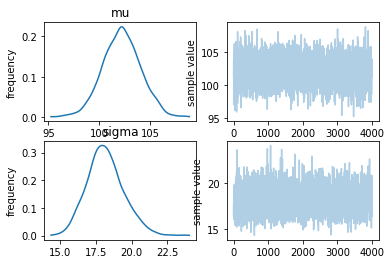

In [7]:
# 結果の図示
mcmc_result.plot()
plt.show()

In [8]:
# トレースプロット(収束の確認)作成のための変数を準備している
# reference http://statmodeling.hatenablog.com/entry/pystan-rstanbook-chap5-1

ms = mcmc_result.extract(permuted=False, inc_warmup=True)
iter_from = mcmc_result.sim['warmup']
burn_range = np.arange(0, ms.shape[0]) # バーンイン期間込み
iter_range = np.arange(iter_from, ms.shape[0]) # バーンイン期間除く

# パラメータ名の表示
paraname = mcmc_result.sim['fnames_oi']
print(paraname)

['mu', 'sigma', 'lp__']


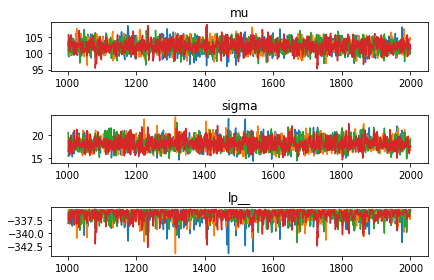

In [10]:
palette = sns.color_palette()
plt.figure()

# トレースプロットの表示
# without burn in range
for pi in range(len(paraname)): # パラメータごとに図示
    plt.subplot(3, 1, pi+1)
    plt.tight_layout()
    [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
    # xがイテレーションの数、yはx回目のイテレーションの全チェーンのプロット
    plt.title(paraname[pi])

plt.show()

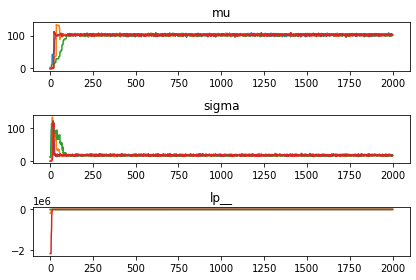

In [11]:
# with burn in range
for pi in range(len(paraname)): # パラメータごとに図示
    plt.subplot(3, 1, pi+1)
    plt.tight_layout()
    [plt.plot(burn_range + 1, ms[burn_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
    # xがイテレーションの数、yはx回目のイテレーションの全チェーンのプロット
    plt.title(paraname[pi])

plt.show()

In [15]:
ms.shape

(2000, 4, 3)

In [14]:
iter_range

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

In [16]:
ms

array([[[ 1.99041509e+00,  1.33865251e+01, -3.14661938e+03],
        [-3.79666852e-01,  1.67510220e+00, -1.93165740e+05],
        [-1.77594118e+00,  1.22044953e+01, -3.98243426e+03],
        [-1.15350033e+00,  5.03038112e-01, -2.17280453e+06]],

       [[ 1.99041509e+00,  1.33865251e+01, -3.14661938e+03],
        [-3.79666852e-01,  1.67510220e+00, -1.93165740e+05],
        [-1.77594118e+00,  1.22044953e+01, -3.98243426e+03],
        [-1.15350033e+00,  5.03038112e-01, -2.17280453e+06]],

       [[ 1.99041509e+00,  1.33865251e+01, -3.14661938e+03],
        [-3.79666852e-01,  1.67510220e+00, -1.93165740e+05],
        [-1.77594118e+00,  1.22044953e+01, -3.98243426e+03],
        [-1.15350033e+00,  5.03038112e-01, -2.17280453e+06]],

       ...,

       [[ 1.01792020e+02,  1.82615212e+01, -3.35497014e+02],
        [ 1.04015625e+02,  1.70860106e+01, -3.36283979e+02],
        [ 9.97156000e+01,  1.87968953e+01, -3.36503440e+02],
        [ 1.01212903e+02,  1.77457900e+01, -3.35610953e+02]],

   